In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from lsss import lsss, util
import msprime as msp
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 200  # 200 e.g. is really fine, but slower
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("png")

<IPython.core.display.Javascript object>

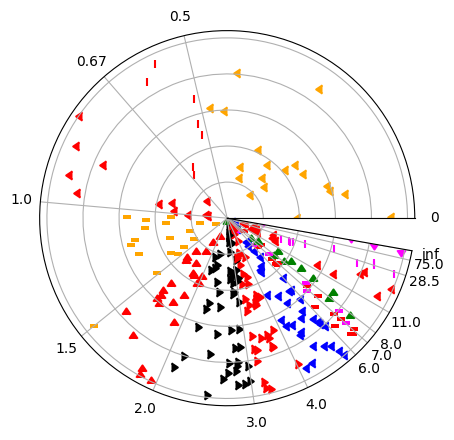

<IPython.core.display.Javascript object>

In [92]:
ts = msp.simulate(
    10, length=1e6, mutation_rate=1e-4, recombination_rate=1e-4, random_seed=1
)
ls = lsss.LiStephensSurface.from_ts(ts, 0, np.arange(1, 10))
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111, projection="polar")

t_max = 350
ax.set_thetamin(0)
ax.set_thetamax(t_max)
f = 4 * (t_max / 360)

theta = f * np.arctan(ls.s_beta.x)

pi = np.pi
ax.set_xticks(theta)
ax.set_xticklabels(["0"] + list(map(str, ls.s_beta.x[1:-1].round(2))) + [r"$\inf$"])
ax.set_yticklabels([])


colors = [
    "red",
    "green",
    "blue",
    "yellow",
    "purple",
    "orange",
    "black",
    "magenta",
    "pink",
]
markers = np.arange(10)
from itertools import product
import random

colors_shapes = list(product(colors, markers))
random.shuffle(colors_shapes)
d = defaultdict(lambda: colors_shapes[len(d)])
for rho, theta in np.random.uniform(
    low=1e-4,
    high=1,
    size=(1_000, 2),
):
    theta, rho = np.exp([theta, rho])
    a, b = util.alpha_beta(theta=theta, rho=rho, n=ls.N)
    try:
        c = ls(theta=(theta), rho=(rho))
    except AssertionError as e:
        continue
        raise ValueError((theta, rho)) from e
    h = util.ls_hap(ts, 0, np.arange(1, 10), alpha=a, beta=b)
    k = (h["r"], h["m"])
    col, mar = d[k]
    t = f * np.arctan(b / a)
    r = np.random.rand()
    # print(theta,rho,a,b,t,r)
    ax.scatter(t, r, color=col, marker=mar)

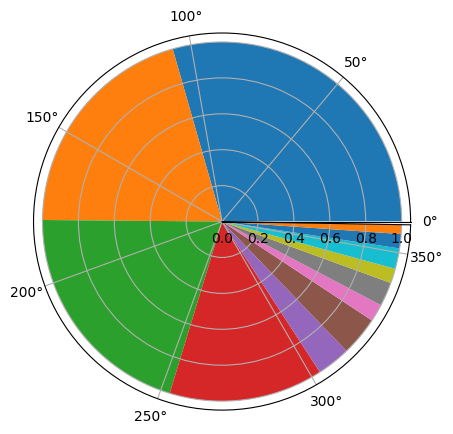

<IPython.core.display.Javascript object>

In [191]:
ts = msp.simulate(10, length=1e6, mutation_rate=1e-4, recombination_rate=1e-4)
ls = lsss.LiStephensSurface.from_ts(ts, 0, np.arange(1, 10))
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111, projection="polar")

t_max = 359
ax.set_thetamin(0)
ax.set_thetamax(t_max)
f = 4 * (t_max / 360)

theta = f * np.arctan(ls.s_beta.x)

for i, x in enumerate(zip(theta[:-1], theta[1:])):
    ax.fill_between(np.linspace(*x, 100), 0, 1)  # , color=ls.s_beta.c[0, i, 0].item())

1

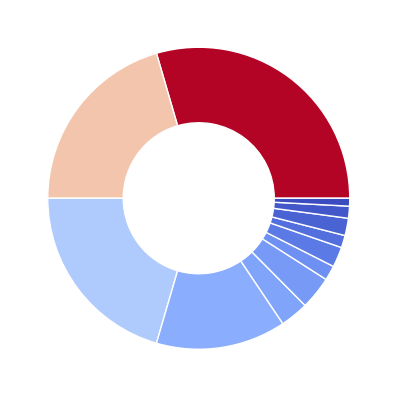

<IPython.core.display.Javascript object>

In [192]:
# ts = msp.simulate(10, length=1e7, mutation_rate=1e-4, recombination_rate=1e-3)
ls = lsss.LiStephensSurface.from_ts(ts, 0, np.arange(1, 10))
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111)

theta = np.diff(np.arctan(ls.s_beta.x))

cmap = plt.get_cmap("coolwarm")
outer_colors = cmap(ls.s_beta.c[0, :, 0] / ls.s_beta.c[0, 0, 0])
ax.pie(theta, radius=1, colors=outer_colors, wedgeprops=dict(width=0.5, edgecolor="w"))
1

1

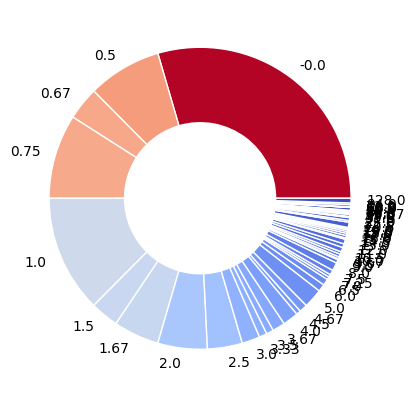

<IPython.core.display.Javascript object>

In [199]:
ts = msp.simulate(
    100,
    length=1e7,
    mutation_rate=1e-4,
    recombination_rate=1e-4,
    demographic_events=[
        msp.PopulationParametersChange(time=0, growth_rate=1e-1),
        msp.PopulationParametersChange(time=1000, growth_rate=0),
    ],
)
ls = lsss.LiStephensSurface.from_ts(ts, 0, np.arange(1, 10))
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(111)

theta = np.diff(np.arctan(ls.s_beta.x))

cmap = plt.get_cmap("coolwarm")
outer_colors = cmap(ls.s_beta.c[0, :, 0] / ls.s_beta.c[0, 0, 0])
ax.pie(
    theta,
    radius=1,
    colors=outer_colors,
    wedgeprops=dict(width=0.5, edgecolor="w"),
    labels=ls.s_beta.x[:-1].round(2),
)
1

In [190]:
theta

array([0.46364761, 0.12435499, 0.19739556, 0.19739556, 0.12435499,
       0.08314123, 0.02173571, 0.03702012, 0.0434509 , 0.033321  ,
       0.0475831 , 0.03224688, 0.02325162, 0.01754206, 0.01369777,
       0.01098857, 0.00471695, 0.01817982, 0.03512931, 0.00717348,
       0.0344691 ])

<IPython.core.display.Javascript object>